<hr>
Plot Sonde Locations on Map
<hr>

In [74]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as mp
import matplotlib.patches as mpatches


import cartopy as cart
import cartopy.crs as ccrs
import cartopy.util as cutil
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

#from mpl_toolkits.basemap import Basemap

<hr>
Set up Sonde locations
<hr>

In [133]:
## Plot Sonde Locations ##

#raobs_reg = 'caribbean'
raobs_reg = 'USAPI'

#slocs = ['Key West','Guantanamo','Guatemala City','Grand Cayman','Grand Bahamas',\
#         'Trinidad','San Juan','Kingston','Swan Island','Bermuda','San Jose','Havana',\
#         'Seawell']
slocs = ['Honolulu','Midway','Kwajalein','Majuro','Guam','Palau','Truk','Yap Island','Hilo', 'Penrhyn Island', \
         'Ponape','Roi-Namur','Pago Pago','San Cristobal','Tarawa','Christmas Island','Cali']
#slocs = ['Honolulu']

In [139]:
slist = {}

slist['Key West']  = [24.55,-81.37]
slist['Guantanamo']  = [19.90,-75.15]
slist['Havana']  = [23.15,-82.35] 
slist['Guatemala City']  = [14.53,-90.57]
slist['Grand Cayman']  = [19.30,-81.37]
slist['Grand Bahamas']  = [26.62,-78.37]
slist['Trinidad']  = [10.68,-61.62]
slist['San Juan']  = [18.45,-66.12]
slist['Kingston']  = [17.93,-76.78]
slist['Swan Island']  = [17.40,-83.93] # Honduras
slist['Bermuda']  = [32.35,-64.70]
slist['San Jose']  = [9.98,-84.22] # Costa Rica
slist['Seawell']  = [13.07,-59.50] # Barbados

# Tropical Pacific Stations

slist['Honolulu']  = [ 21.35 ,-157.93] # Airport 
slist['Midway']  = [28.22 ,-177.37] 
slist['Penrhyn Island'] = [-9.00, -158.05] # Cook islands
slist['Kwajalein'] = [8.73,167.73] 
slist['Majuro'] = [7.08,171.38] 
slist['Guam'] = [13.55 , 144.83] 
slist['Palau'] = [7.33 , 134.48] # Micronesia
slist['Truk'] = [7.47,151.85] # Micronesia
slist['Yap Island'] = [9.48,138.08] # Micronesia
slist['Ponape'] = [6.97,158.22] # Micronesia
slist['Roi-Namur'] = [9.40,167.47] # Marshall Is
slist['Pago Pago'] = [-14.33,-170.72] # Mariana Is
slist['San Cristobal'] = [-0.90,-89.60] # Galapogos (Ecuador)
slist['Tarawa'] = [1.35, 172.92] # Kiribati
slist['Christmas Island'] = [2.00,-157.40] # Line Islands (KA) - Kiritimati
slist['Portoviejo'] = [-1.03, -80.43] # Ecuador coast
slist['Hilo'] = [19.72, -155.07] # Hawaii
slist['Easter Island'] = [-27.15, -109.42] # Hawaii
slist['Penrhyn Island'] = [-9.00, -158.05] # Cook Islands
slist['Cali'] = [3.54, -76.38] # Columbia

    
slist_df = pd.DataFrame.from_dict(slist, orient='index',columns=['lat','lon'])

<hr>
Plotting Locations
<hr>

[-2.0000000e+00 -1.8000000e+00 -1.6000000e+00 -1.4000000e+00
 -1.2000000e+00 -1.0000000e+00 -8.0000000e-01 -6.0000000e-01
 -4.0000000e-01 -2.0000000e-01 -4.4408921e-16  2.0000000e-01
  4.0000000e-01  6.0000000e-01  8.0000000e-01  1.0000000e+00
  1.2000000e+00  1.4000000e+00  1.6000000e+00  1.8000000e+00
  2.0000000e+00]
-Honolulu 21.35 N -157.93 E
-Midway 28.22 N -177.37 E
-Kwajalein 8.73 N 167.73 E
-Majuro 7.08 N 171.38 E
-Guam 13.55 N 144.83 E
-Palau 7.33 N 134.48 E
-Truk 7.47 N 151.85 E
-Yap Island 9.48 N 138.08 E
-Hilo 19.72 N -155.07 E
-Penrhyn Island -9.0 N -158.05 E
-Ponape 6.97 N 158.22 E
-Roi-Namur 9.4 N 167.47 E
-Pago Pago -14.33 N -170.72 E
-San Cristobal -0.9 N -89.6 E
-Tarawa 1.35 N 172.92 E
-Christmas Island 2.0 N -157.4 E
-Cali 3.54 N -76.38 E


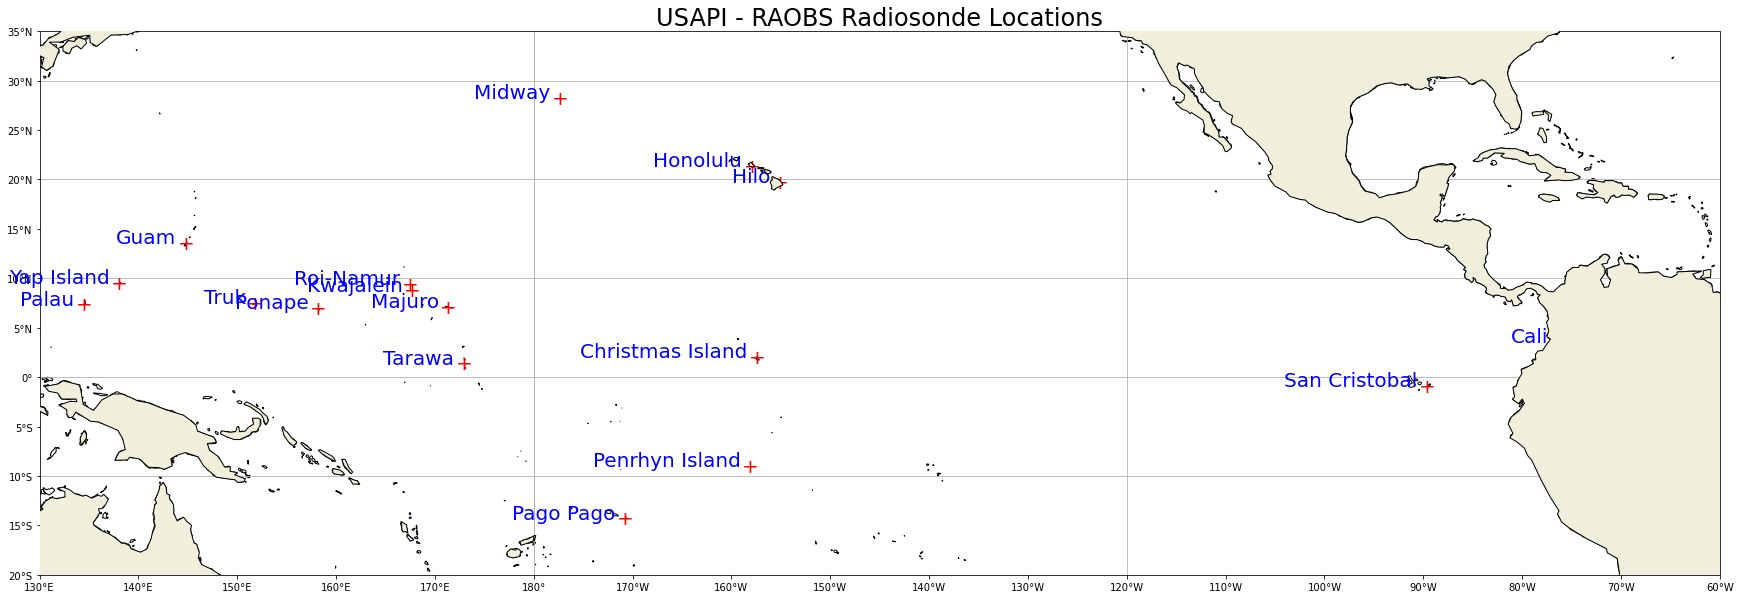

In [140]:
## Plot Map ##

#cmap='coolwarm'
cmap='RdBu_r'
#cmap='PRGn'

'''
 Obs Variable (SST/prec)
'''

lanom = True
enso = 'nino'
losst = True 
loprec = False
years = '1979','2005'

dir_inputdata = '/glade/p/cesmdata/cseg/inputdata/atm/cam/sst/'
hadisst_file = 'sst_HadOIBl_bc_0.9x1.25_1850_2020_c210521.nc'
file_sst = dir_inputdata+hadisst_file

var_sst = 'SST_cpl'
ds_sst = xr.open_dataset(file_sst,engine='netcdf4')


# Subset years and grab variables
ds_sst = ds_sst.sel(time=slice(years[0],years[1]))
sst_2d = ds_sst[vname_2d]


# All the month names
mnames_all = ds_sst.time.dt.strftime("%b") 
mnames = pd.unique(mnames_all)


# All the year names
years_all = ds_sst.time.dt.strftime("%Y") 

# Months to ave for weighting.
mon_aves = ['Dec','Jan','Feb']
mon_wgts = [31,31,28] 

# Set nino region and threshold for averaging
nino_s, nino_n, nino_w, nino_e = -5.,5.,190.,240.

# Nino o rnina criteria
enso_months = sst_nino > 0.5 if enso == 'nino' else sst_nino < -0.5 # Threshold for El Nino

# Average timeseries for nino region and over the requested years.
sst_nino = sst_2d.loc[:,nino_s:nino_n,nino_w:nino_e].mean(dim=['lat','lon'])


# Construct timeseries anomlaies from monthly annual cycle.
for im,imname in enumerate(mnames)  :
#        print(imname,imon_ts.size)
        imon_ts = mnames_all == imname # All JANs/FEBs e.g.

        msst_nino = sst_nino[imon_ts].mean(axis=0) # Month average      
        sst_nino[imon_ts] = sst_nino[imon_ts] - msst_nino
        sst_2d[imon_ts,:,:] = sst_2d[imon_ts,:,:] - sst_2d[imon_ts,:,:].mean(axis=0)
        
# Criteria to be included a nino composite + correct months (mostly DJF)
lclimo_months = np.in1d(mnames_all, ['Dec','Jan','Feb'])
nino_mnths = np.where((enso_months) & lclimo_months)


# Construct nino composite event.
if lanom:
    var_2d_mplot = sst_2d[nino_mnths[0],:,:].mean(axis=0)
    
    


        
#cmin =14. ; cmax =30. ; dcont = 0.5
cmin =-2. ; cmax =2. ; dcont = 0.2
plevels =  np.arange(cmin,cmax+dcont,dcont,dtype=float)
print(plevels)

'''
    PLOTTING
'''

extent = [240., 290., -10., 10.]
mp.figure(figsize=(40, 10))


ax = mp.subplot(111, projection=ccrs.PlateCarree(central_longitude=180))

projection = ccrs.PlateCarree()

ax.set_extent(extent)
ax.gridlines()
ax.coastlines(resolution='50m')
ax.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')

ax.set_xticks([130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300],  crs=ccrs.PlateCarree())
ax.set_yticks([-20,-15,-10,-5,0,5,10,15,20,25,30,35], crs=ccrs.PlateCarree())

lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_title(raobs_reg+' - RAOBS Radiosonde Locations',fontsize=24)


#var_2d_mplot,lon_cycl = cutil.add_cyclic_point(var_2d_mplot, coord=var_2d['lon'])
#rmap = mp.contourf(ds_var.lon,ds_var.lat,var_2d_mplot,levels=plevels,cmap=cmap,transform=projection)
#mp.colorbar(rmap, ax=ax, shrink=0.9)
#ax.clabel(rmap, inline=1, fontsize=20)

# Add elipse

x1, y1 = 200., -8.
x2, y2 = 270., -10.

#el = ax.add_patch(mpatches.Ellipse((x1, y1), 90, 15, angle=-15, alpha=0.1,color = 'black',transform=projection))
#ax.add_artist(el)


for splot in slocs:
    slat = slist_df.loc[splot]['lat'] ; slon = slist_df.loc[splot]['lon'] 
    print('-'+splot,slat,'N',slon,'E')
    mp.text(slon-1.0, slat, splot,transform=ccrs.Geodetic(),color='blue',horizontalalignment='right',size=20)
    mp.text(slon, slat, '+',transform=ccrs.Geodetic(),color='red',size=20,ha='center', va='center')


mp.savefig('pdf_vres_'+raobs_reg+'.png', dpi=100) 


In [137]:
from cartopy.io.img_tiles import GoogleTiles
class ShadedReliefESRI(GoogleTiles):
    # shaded relief
    def _image_url(self, tile):
        x, y, z = tile
        url = ('https://server.arcgisonline.com/ArcGIS/rest/services/' \
               'World_Shaded_Relief/MapServer/tile/{z}/{y}/{x}.jpg').format(
               z=z, y=y, x=x)
        return url